In [1]:
# Install the libraries (if using binder)
#!pip install numpy
#!pip install pandas
#!pip install matplotlib
#!pip install seaborn
#!pip install pylab
#!pip install plotly
#!pip install geopy

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pylab as plot
import plotly.graph_objects as go
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="my_user_agent")

### Reading the csv file and get it into a dataframe format

In [3]:
df = pd.read_csv("pollution_us_2000_2016.csv")

In [4]:
print(f'The dataframe has {len(df)} rows and {df.shape[1]} columns')

The dataframe has 1746661 rows and 29 columns


Based on the above numbers, one concludes that the dataframe corresponds to very large dataset <em>(Big Data)</em>. Therefore, it is not advisable to view the entire dataframe as that will be a super memory expensive task. One needs to perform the analytics in a smarter way so as to the get the desired results while making sure not to put too much load on the memory.

In [5]:
all_states = df['State'].unique()
num_states = len(all_states)

In [6]:
print(f'There are {num_states} states in the dataset.')

There are 47 states in the dataset.


In [7]:
print(f'The columns in the dataframe are given by \n{df.columns}')

The columns in the dataframe are given by 
Index(['Unnamed: 0', 'State Code', 'County Code', 'Site Num', 'Address',
       'State', 'County', 'City', 'Date Local', 'NO2 Units', 'NO2 Mean',
       'NO2 1st Max Value', 'NO2 1st Max Hour', 'NO2 AQI', 'O3 Units',
       'O3 Mean', 'O3 1st Max Value', 'O3 1st Max Hour', 'O3 AQI', 'SO2 Units',
       'SO2 Mean', 'SO2 1st Max Value', 'SO2 1st Max Hour', 'SO2 AQI',
       'CO Units', 'CO Mean', 'CO 1st Max Value', 'CO 1st Max Hour', 'CO AQI'],
      dtype='object')


One would now like to get rid of the columns that are not going to be useful for our analytics.

In [8]:
# columns to be dropped
drop_cols = ['Unnamed: 0', 'State Code', 'County Code', 'Site Num', 'Address', 'NO2 1st Max Value', 'NO2 1st Max Hour', 'NO2 AQI', 'O3 1st Max Value', 'O3 1st Max Hour', 'O3 AQI', 'SO2 1st Max Value', 'SO2 1st Max Hour', 'SO2 AQI', 'CO 1st Max Value', 'CO 1st Max Hour', 'CO AQI']

In [9]:
df.drop(drop_cols, axis=1, inplace=True)

In [10]:
print(f'The dataframe now contains {len(df)} rows and {df.shape[1]} columns')

The dataframe now contains 1746661 rows and 12 columns



To get some idea about the entries in the dataframe, instad of looking at the entire dataframe, one peeks at only few rows.

In [11]:
df.head()

State    County     City  Date Local          NO2 Units   NO2 Mean  \
0  Arizona  Maricopa  Phoenix  2000-01-01  Parts per billion  19.041667   
1  Arizona  Maricopa  Phoenix  2000-01-01  Parts per billion  19.041667   
2  Arizona  Maricopa  Phoenix  2000-01-01  Parts per billion  19.041667   
3  Arizona  Maricopa  Phoenix  2000-01-01  Parts per billion  19.041667   
4  Arizona  Maricopa  Phoenix  2000-01-02  Parts per billion  22.958333   

            O3 Units   O3 Mean          SO2 Units  SO2 Mean  \
0  Parts per million  0.022500  Parts per billion  3.000000   
1  Parts per million  0.022500  Parts per billion  3.000000   
2  Parts per million  0.022500  Parts per billion  2.975000   
3  Parts per million  0.022500  Parts per billion  2.975000   
4  Parts per million  0.013375  Parts per billion  1.958333   

            CO Units   CO Mean  
0  Parts per million  1.145833  
1  Parts per million  0.878947  
2  Parts per million  1.145833  
3  Parts per million  0.878947  
4  Parts per million  0.850000

### Conversion of Units to achieve uniformity

By peeking at the above tiny dataframe, one sees that the units are not uniform for all the gases. Before converting all the units, one must make sure if all the entries in particular units column are the same, i.e., for a gas <em>x</em>, one would like to make sure if it is always measured in the same units.} 

In [12]:
def same_units(df, col):
    """ Checks if all the entries of a column in the dataframe are same. In the context of the project,
    it checks if all unit columns have same units.
    
    Args:
        df (dataframe): the dataframe whose column is to be inspected.
        col (str): the column name whose entries are to to be inspected.
    
    Returns:
        True if all the entries are same, else False.
    """
    if len(df[col].unique()) == 1:
        return True
    return False

def get_units(df, col):
    """ 
    Returns all the units present in the unit column of the dataframe.
    """
    return df[col].unique()

In [13]:
same_units(df, 'NO2 Units')

True

In [14]:
get_units(df, 'NO2 Units')

array(['Parts per billion'], dtype=object)

In [15]:
same_units(df, 'SO2 Units')

True

In [16]:
get_units(df, 'SO2 Units')

array(['Parts per billion'], dtype=object)

In [17]:
same_units(df, 'O3 Units')

True

In [18]:
get_units(df, 'O3 Units')

array(['Parts per million'], dtype=object)

In [19]:
same_units(df, 'CO Units')

True

In [20]:
get_units(df, 'CO Units')

array(['Parts per million'], dtype=object)


Note that, $NO_2$ and $SO_2$ are **always** measured in parts per billion (ppb), while $O_3$ and $CO$ are **always** measured in parts per million (ppm).

A standard unit in the field of science is parts per million (ppm), hence one would like to convert $NO_2$ and $SO_2$ into parts per million (ppm).

In [21]:
df['NO2 Mean'] = df['NO2 Mean']/1000
df['SO2 Mean'] = df['SO2 Mean']/1000


The columns describing the units are now irrelevant, hence, one would like to discard all of these columns to get even more finer dataframe.


In [22]:
unit_cols = ['NO2 Units', 'SO2 Units', 'O3 Units', 'CO Units']
df.drop(unit_cols, axis=1, inplace=True)

Before, moving ahead, a good practice is to check if there are any NaN, i.e., missing values in the dataframe. 

In [23]:
df.isna().any()

State         False
County        False
City          False
Date Local    False
NO2 Mean      False
O3 Mean       False
SO2 Mean      False
CO Mean       False
dtype: bool

Therefore, none of the above columns contain any missing value. Great!!

### Rename the 'Date Local' column and make it the index of the dataframe.

To see the trends with time, it is a good practice to have the date column as the index of the dataframe.

In [24]:
df.rename(columns={'Date Local':'Date'}, inplace=True)

In [25]:
# first check the type of the Date column
df['Date'].dtypes

dtype('O')

One would like to convert this into a 'DateTime Object' since that makes it easier to parse dates and do analysis on it.

In [26]:
df['Date'] = pd.to_datetime(df['Date'])

In [27]:
# make 'Date' as the index of the dataframe
df.set_index('Date', inplace=True)

In [28]:
# let us take a peek at the dataframe
df.tail()

State   County           City  NO2 Mean   O3 Mean  SO2 Mean  \
Date                                                                        
2016-03-30  Wyoming  Laramie  Not in a city  0.001083  0.043917  0.000000   
2016-03-31  Wyoming  Laramie  Not in a city  0.000939  0.045263 -0.000023   
2016-03-31  Wyoming  Laramie  Not in a city  0.000939  0.045263 -0.000023   
2016-03-31  Wyoming  Laramie  Not in a city  0.000939  0.045263  0.000000   
2016-03-31  Wyoming  Laramie  Not in a city  0.000939  0.045263  0.000000   

             CO Mean  
Date                  
2016-03-30  0.091667  
2016-03-31  0.067714  
2016-03-31  0.100000  
2016-03-31  0.067714  
2016-03-31  0.100000

### Insert Total Mean Column

In order to quantify $NO_2$, $O_3$, $SO_2$ and $CO$ as one single entity for each state, one would like to get a **Total Mean** column, that allows us to do exactly that. The entries of this columns will act as a a measure for each state and will help us see how each of these states have performed through time.

In [29]:
df['Total Mean'] = df['NO2 Mean'] + df['SO2 Mean'] + df['CO Mean'] + df['O3 Mean']
df.head()

State    County     City  NO2 Mean   O3 Mean  SO2 Mean  \
Date                                                                   
2000-01-01  Arizona  Maricopa  Phoenix  0.019042  0.022500  0.003000   
2000-01-01  Arizona  Maricopa  Phoenix  0.019042  0.022500  0.003000   
2000-01-01  Arizona  Maricopa  Phoenix  0.019042  0.022500  0.002975   
2000-01-01  Arizona  Maricopa  Phoenix  0.019042  0.022500  0.002975   
2000-01-02  Arizona  Maricopa  Phoenix  0.022958  0.013375  0.001958   

             CO Mean  Total Mean  
Date                              
2000-01-01  1.145833    1.190375  
2000-01-01  0.878947    0.923489  
2000-01-01  1.145833    1.190350  
2000-01-01  0.878947    0.923464  
2000-01-02  0.850000    0.888292

### Get individual Dataframe for each of the Gases
The goal now is to create individual dataframes for each of the gases, with columns representing each of the states. One would also like to discard the states that have missing value for any of the years.

Note that, we the original dataset has 47 states (as computed before). It might be the case, that not all of them have values recorded for all the yeras from 2000 to 2016. We would like to get rid of them.

In [30]:
def get_df(gas_name):
    """
    Computes dataframe for a particular gas with rows as years from 2000 to 2016 and columns as states.
    
    Args:
        gas_name (str): can be any of the NO2 Mean, SO2 Mean, O3 Mean, CO Mean or Total Mean.
    
    Returns:
        result (dataframe): rows are years, columns are states and an entry corresponds to average of all the 
                            emissions of the gas for the corresponding year and state. 
    """
    
    global df, all_states
    
    df_year_list = [df.loc[str(i)] for i in range(2000, 2017)]
    
    # populates dictionary with states as the keys and list of values
    dict_of_lists = {state:[] for state in all_states}
    
    for df_year in df_year_list:
        for state in all_states:
            # extract dataframe for that particular state
            state_vals = df_year[df_year['State'] == state]
            # get the average of all the values for the particular state and df_year
            dict_of_lists[state].append(state_vals[gas_name].mean())
    
    # convert the dictionary to a dataframe
    result = pd.DataFrame(dict_of_lists)
    
    # change the indices so that they reflect years
    index_list = [item for item in range(2000, 2017)]
    result.index = index_list
    
    # get only the columns for which one has non-NaN values.
    result.dropna(axis = 1, inplace=True)
    return result

In [31]:
# dataframe for no2
no2_df = get_df('NO2 Mean')

In [32]:
# dataframe for so2
so2_df = get_df('SO2 Mean')

In [33]:
# dataframe for co
co_df = get_df('CO Mean')

In [34]:
# dataframe for o3
o3_df = get_df('O3 Mean')

In [35]:
# dataframe for 'Total Mean'
total_df = get_df('Total Mean')

Let us check one of the dataframes to see how it looks:

In [36]:
no2_df

Arizona  California  Colorado  District Of Columbia   Florida  \
2000  0.026488    0.017581  0.014902              0.022726  0.012453   
2001  0.022745    0.017761  0.025783              0.024474  0.012388   
2002  0.023665    0.016755  0.019769              0.024441  0.011314   
2003  0.023101    0.015795  0.021073              0.022641  0.010930   
2004  0.020134    0.015151  0.021645              0.020956  0.009516   
2005  0.021360    0.013966  0.024177              0.020837  0.008644   
2006  0.020835    0.014016  0.024645              0.015967  0.008520   
2007  0.019330    0.013076  0.023835              0.015332  0.006136   
2008  0.018251    0.012977  0.019081              0.018058  0.005214   
2009  0.017156    0.012873  0.014231              0.018303  0.006028   
2010  0.015917    0.012247  0.016171              0.017644  0.005672   
2011  0.016615    0.012283  0.017526              0.015929  0.005362   
2012  0.017832    0.011071  0.020321              0.016273  0.005407   
2013  0.015480    0.011762  0.014343              0.011500  0.004546   
2014  0.016112    0.010884  0.016904              0.012303  0.004979   
2015  0.012705    0.010269  0.020039              0.013233  0.004110   
2016  0.015811    0.008102  0.023624              0.012461  0.005493   

      Illinois   Indiana    Kansas  Louisiana  New York  North Carolina  \
2000  0.026437  0.015288  0.009704   0.017346  0.023167        0.015173   
2001  0.022357  0.014948  0.010595   0.017359  0.025032        0.013854   
2002  0.019854  0.016393  0.008776   0.018008  0.023964        0.012266   
2003  0.020684  0.014523  0.009623   0.015563  0.022882        0.011956   
2004  0.018814  0.013781  0.009540   0.015816  0.020890        0.010630   
2005  0.017899  0.013231  0.010950   0.014400  0.021336        0.012434   
2006  0.017392  0.013923  0.011178   0.014992  0.019239        0.012285   
2007  0.014502  0.010994  0.013394   0.015199  0.018541        0.013916   
2008  0.014086  0.009289  0.016808   0.013101  0.016704        0.011208   
2009  0.013417  0.010136  0.012272   0.012875  0.012977        0.009852   
2010  0.013035  0.009392  0.013067   0.012699  0.012981        0.011689   
2011  0.012111  0.009906  0.013101   0.011666  0.013088        0.009995   
2012  0.011954  0.009840  0.012066   0.011401  0.018095        0.008672   
2013  0.010984  0.010360  0.011860   0.009645  0.017920        0.008482   
2014  0.010548  0.011334  0.011031   0.010481  0.016921        0.007745   
2015  0.008380  0.013494  0.011036   0.009386  0.017166        0.006945   
2016  0.010374  0.013857  0.011585   0.012911  0.017847        0.007471   

      Oklahoma  Pennsylvania     Texas  
2000  0.004771      0.016131  0.016347  
2001  0.008272      0.015966  0.016241  
2002  0.006610      0.014585  0.016094  
2003  0.006296      0.014061  0.015610  
2004  0.005397      0.013627  0.013786  
2005  0.008135      0.013449  0.013879  
2006  0.007873      0.012460  0.013524  
2007  0.007787      0.012142  0.013107  
2008  0.006231      0.011102  0.010625  
2009  0.006455      0.010652  0.008671  
2010  0.006442      0.010943  0.010823  
2011  0.006744      0.011238  0.010375  
2012  0.006483      0.011092  0.010316  
2013  0.006744      0.009624  0.009572  
2014  0.006023      0.009267  0.009534  
2015  0.007806      0.006998  0.009253  
2016  0.008125      0.007416  0.010357

In [37]:
print(f'There are {len(no2_df.columns)} states in the datframe corresponding to the nitrogen dioxide emissions.')

There are 14 states in the datframe corresponding to the nitrogen dioxide emissions.


Naturally, one would like to know if all the dataframes have same states.

In [38]:
print(total_df.columns == no2_df.columns)
print(no2_df.columns == o3_df.columns)
print(o3_df.columns == so2_df.columns)
print(so2_df.columns == co_df.columns)

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True]
[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True]
[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True]
[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True]


Therefore, only these 14 states have their data recorded from 2000 to 2016. Rest other states have missing data, hence are discareded in our analysis.

# Line Plots

Let us plot individual line plots for each of the gases to infer a visualization trend of how each of the 14 states are performed from 2000 to 2016 for each of the gases.

In [39]:
params = {'legend.fontsize': 23,
          'legend.handlelength': 2,
         'font.size': 27}
plot.rcParams.update(params)

In [40]:
# Setting the style of the Seaborn line Plots
sns.set_style("whitegrid")
plot_colors = ['#ff0000', '#940606', '#5c1414', '#ff8c00', '#965709', '#b59509', '#91790c', '#84910c', '#c1db00', '#37db00', '#216e08', '#00ffd9', '#033b6b', '#0089ff']
plot_line_styles = ['-', '--','-.', '-.', '--', '-', '--','-.', '-.', '--', '--','-.', '-.', '-']

Text(0, 0.5, 'SO2 (ppm)')

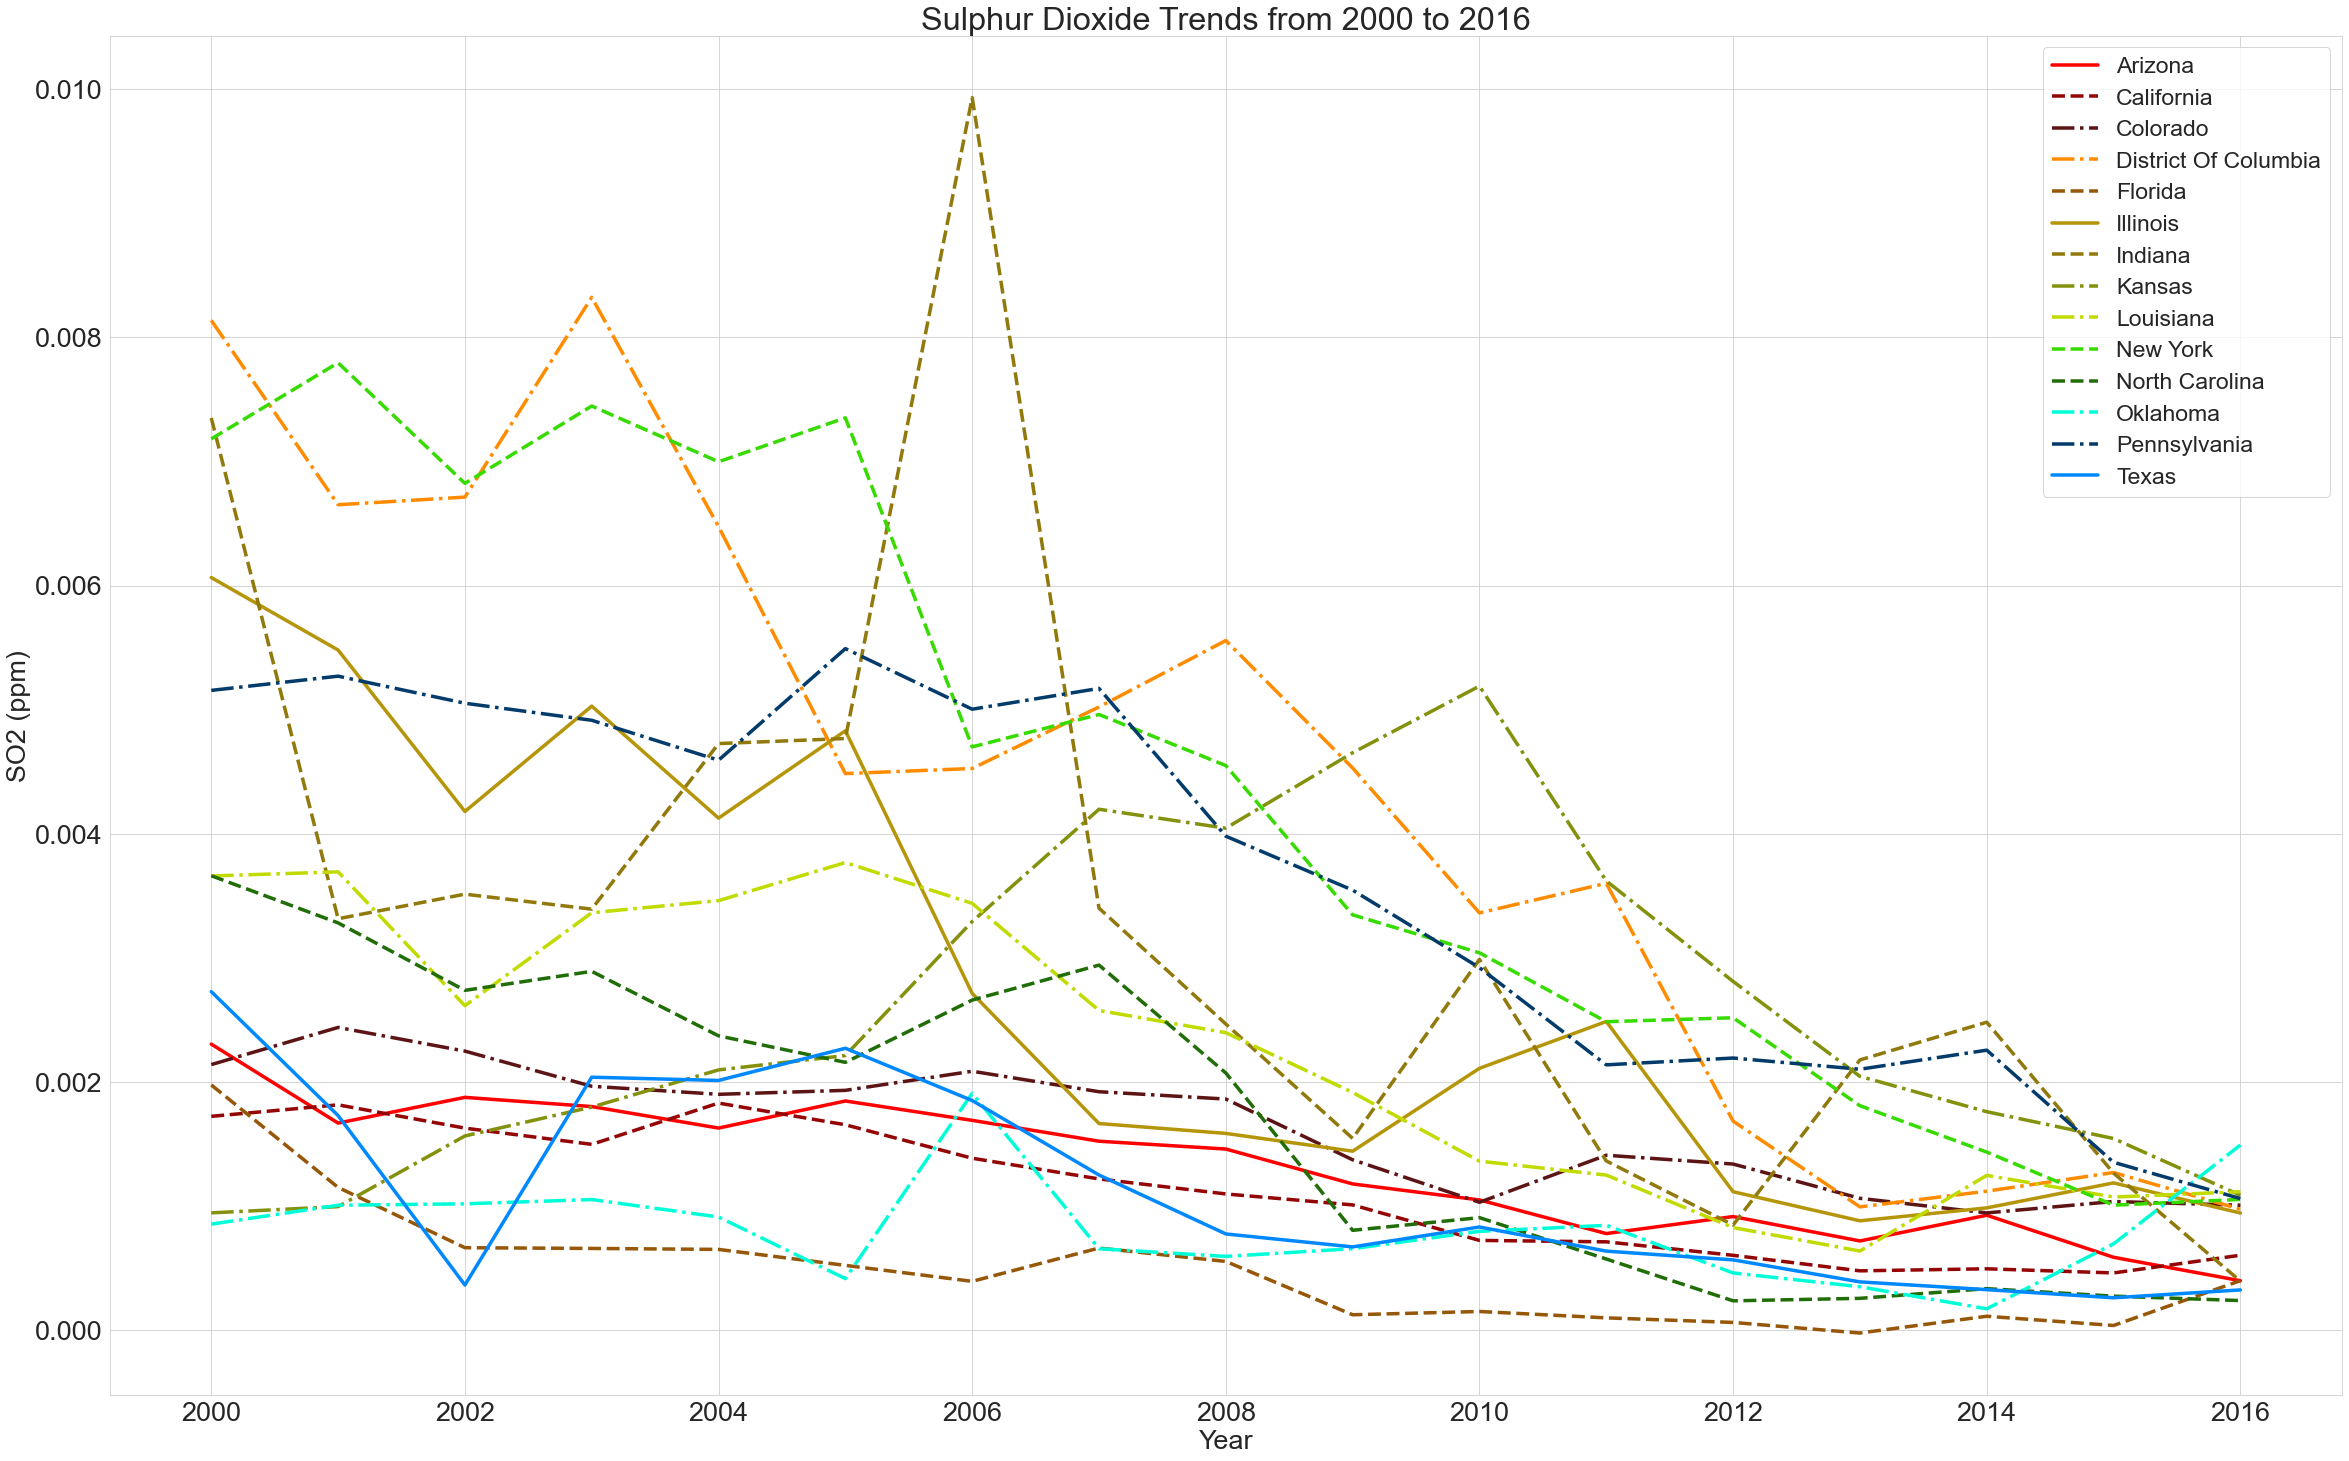

In [41]:
# SO2
so2_df.plot(figsize=(40,25), color = plot_colors, linewidth=3.5, style = plot_line_styles)
plt.title("Sulphur Dioxide Trends from 2000 to 2016")
plt.xlabel("Year")
plt.ylabel("SO2 (ppm)")

Text(0, 0.5, 'NO2 (ppm)')

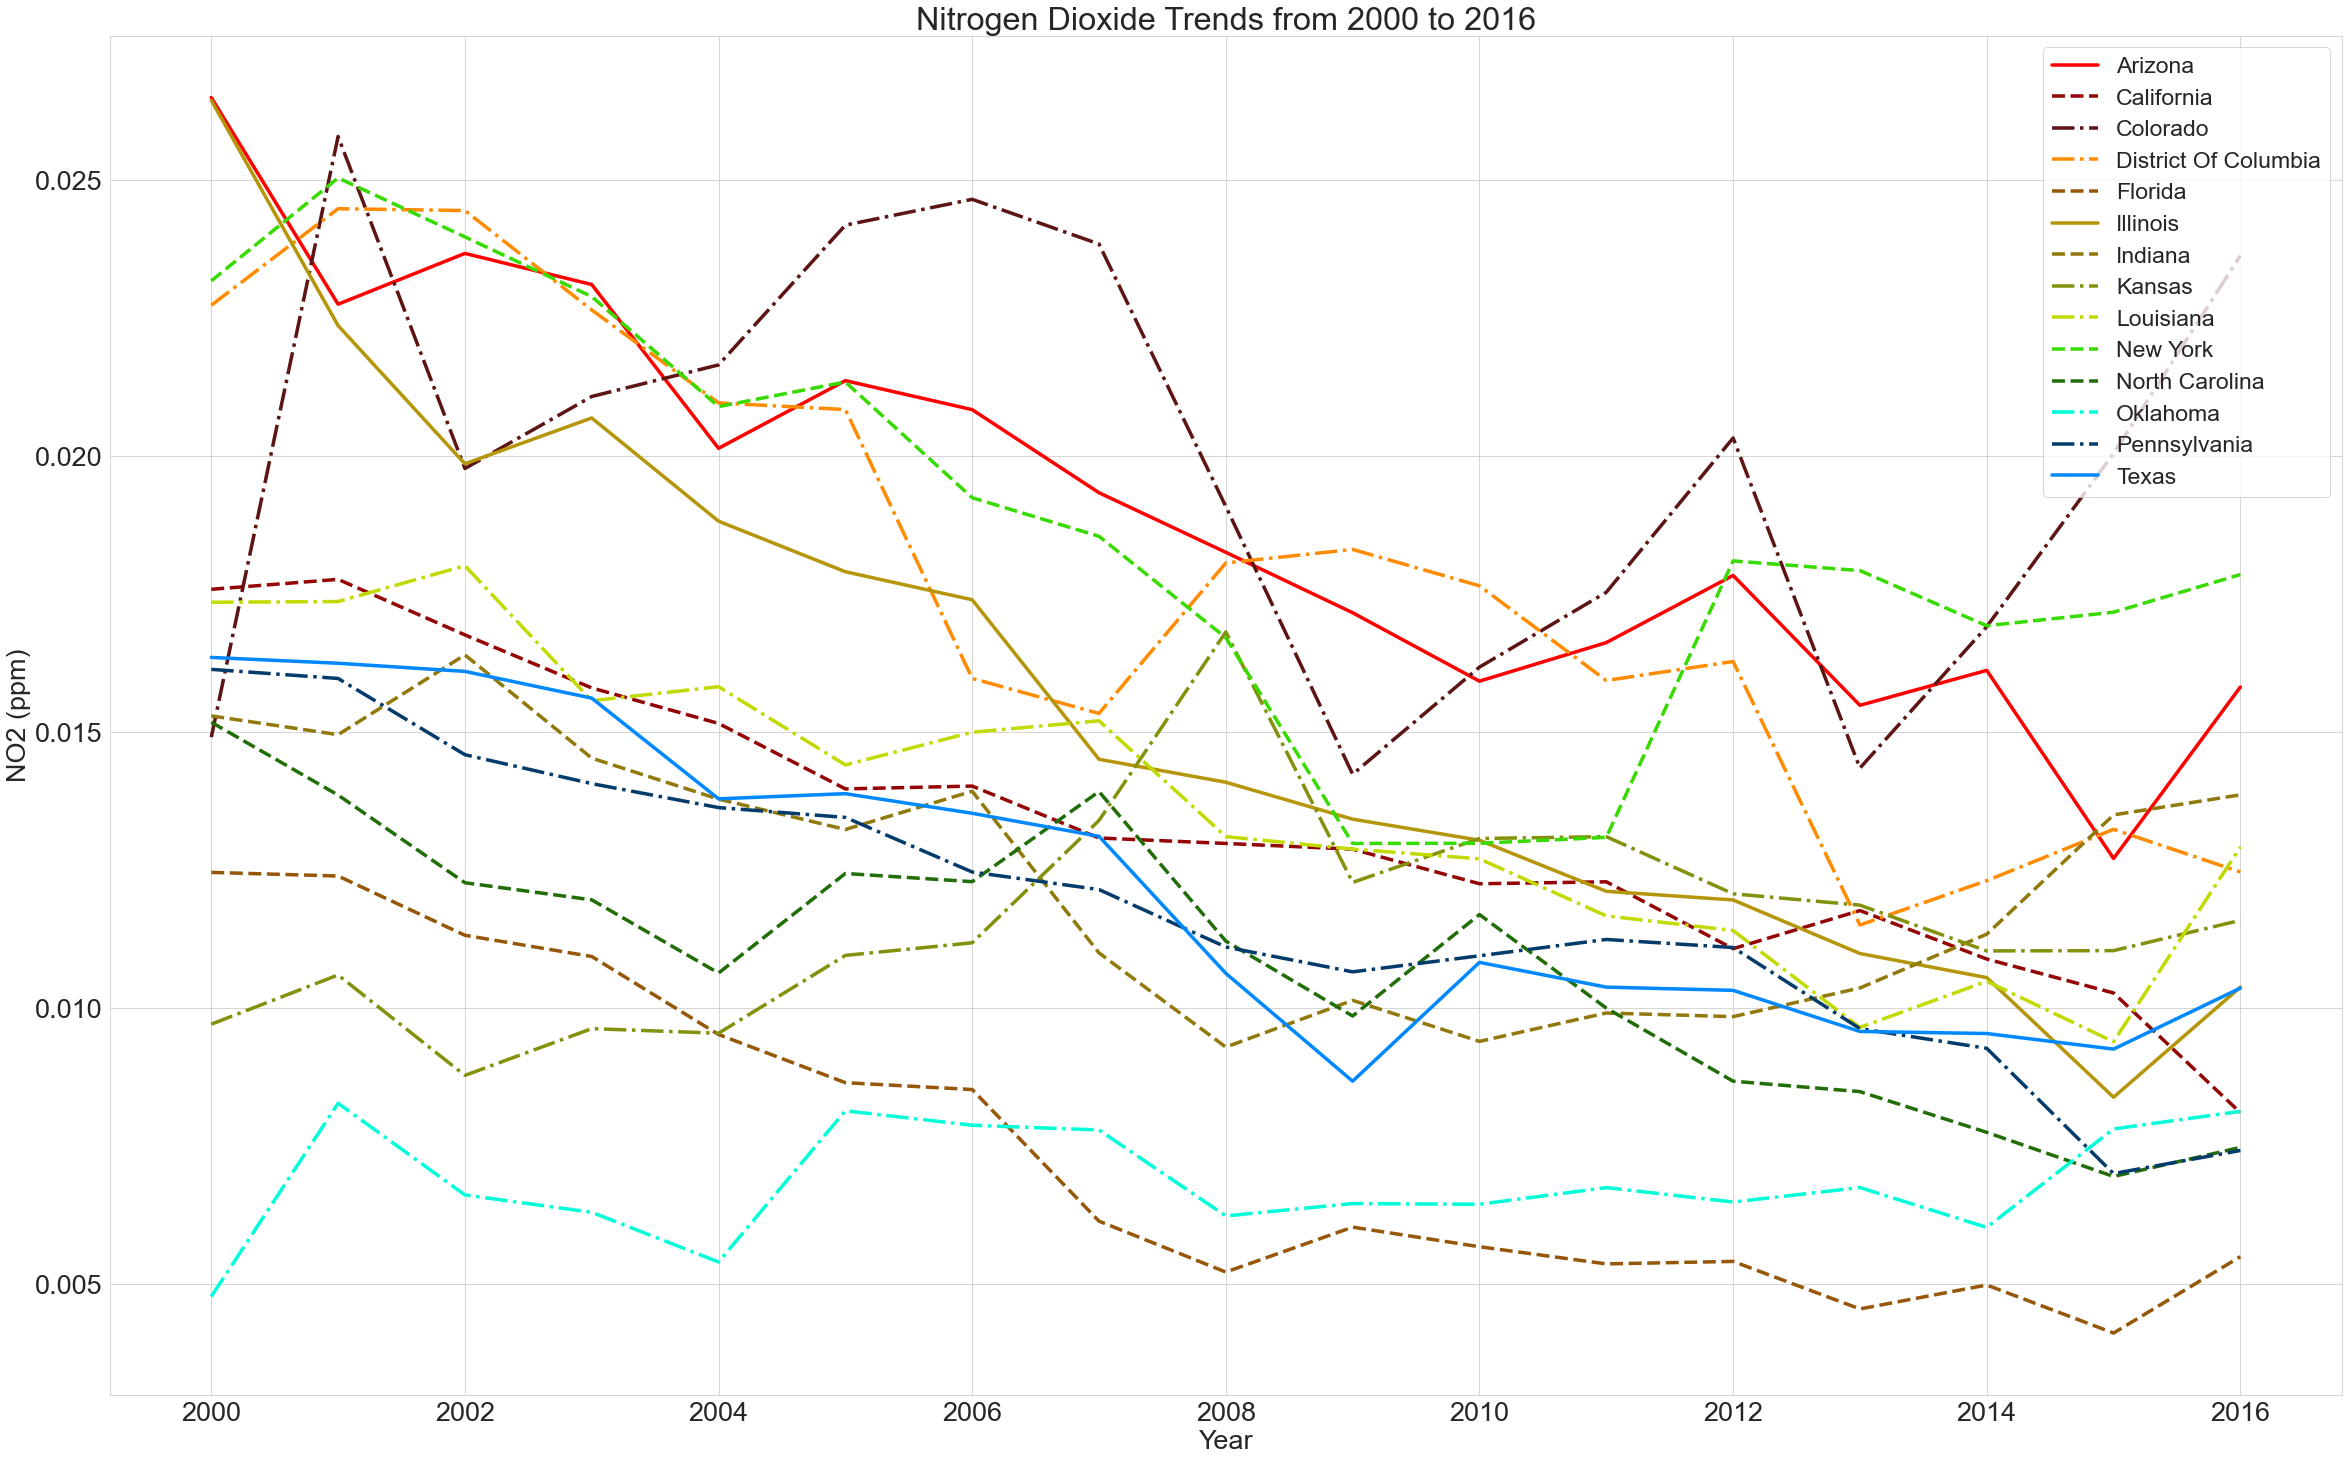

In [42]:
# NO2
no2_df.plot(figsize=(40,25), color = plot_colors, linewidth=3.5, style = plot_line_styles)
plt.title("Nitrogen Dioxide Trends from 2000 to 2016")
plt.xlabel("Year")
plt.ylabel("NO2 (ppm)")

Text(0, 0.5, 'O3 (ppm)')

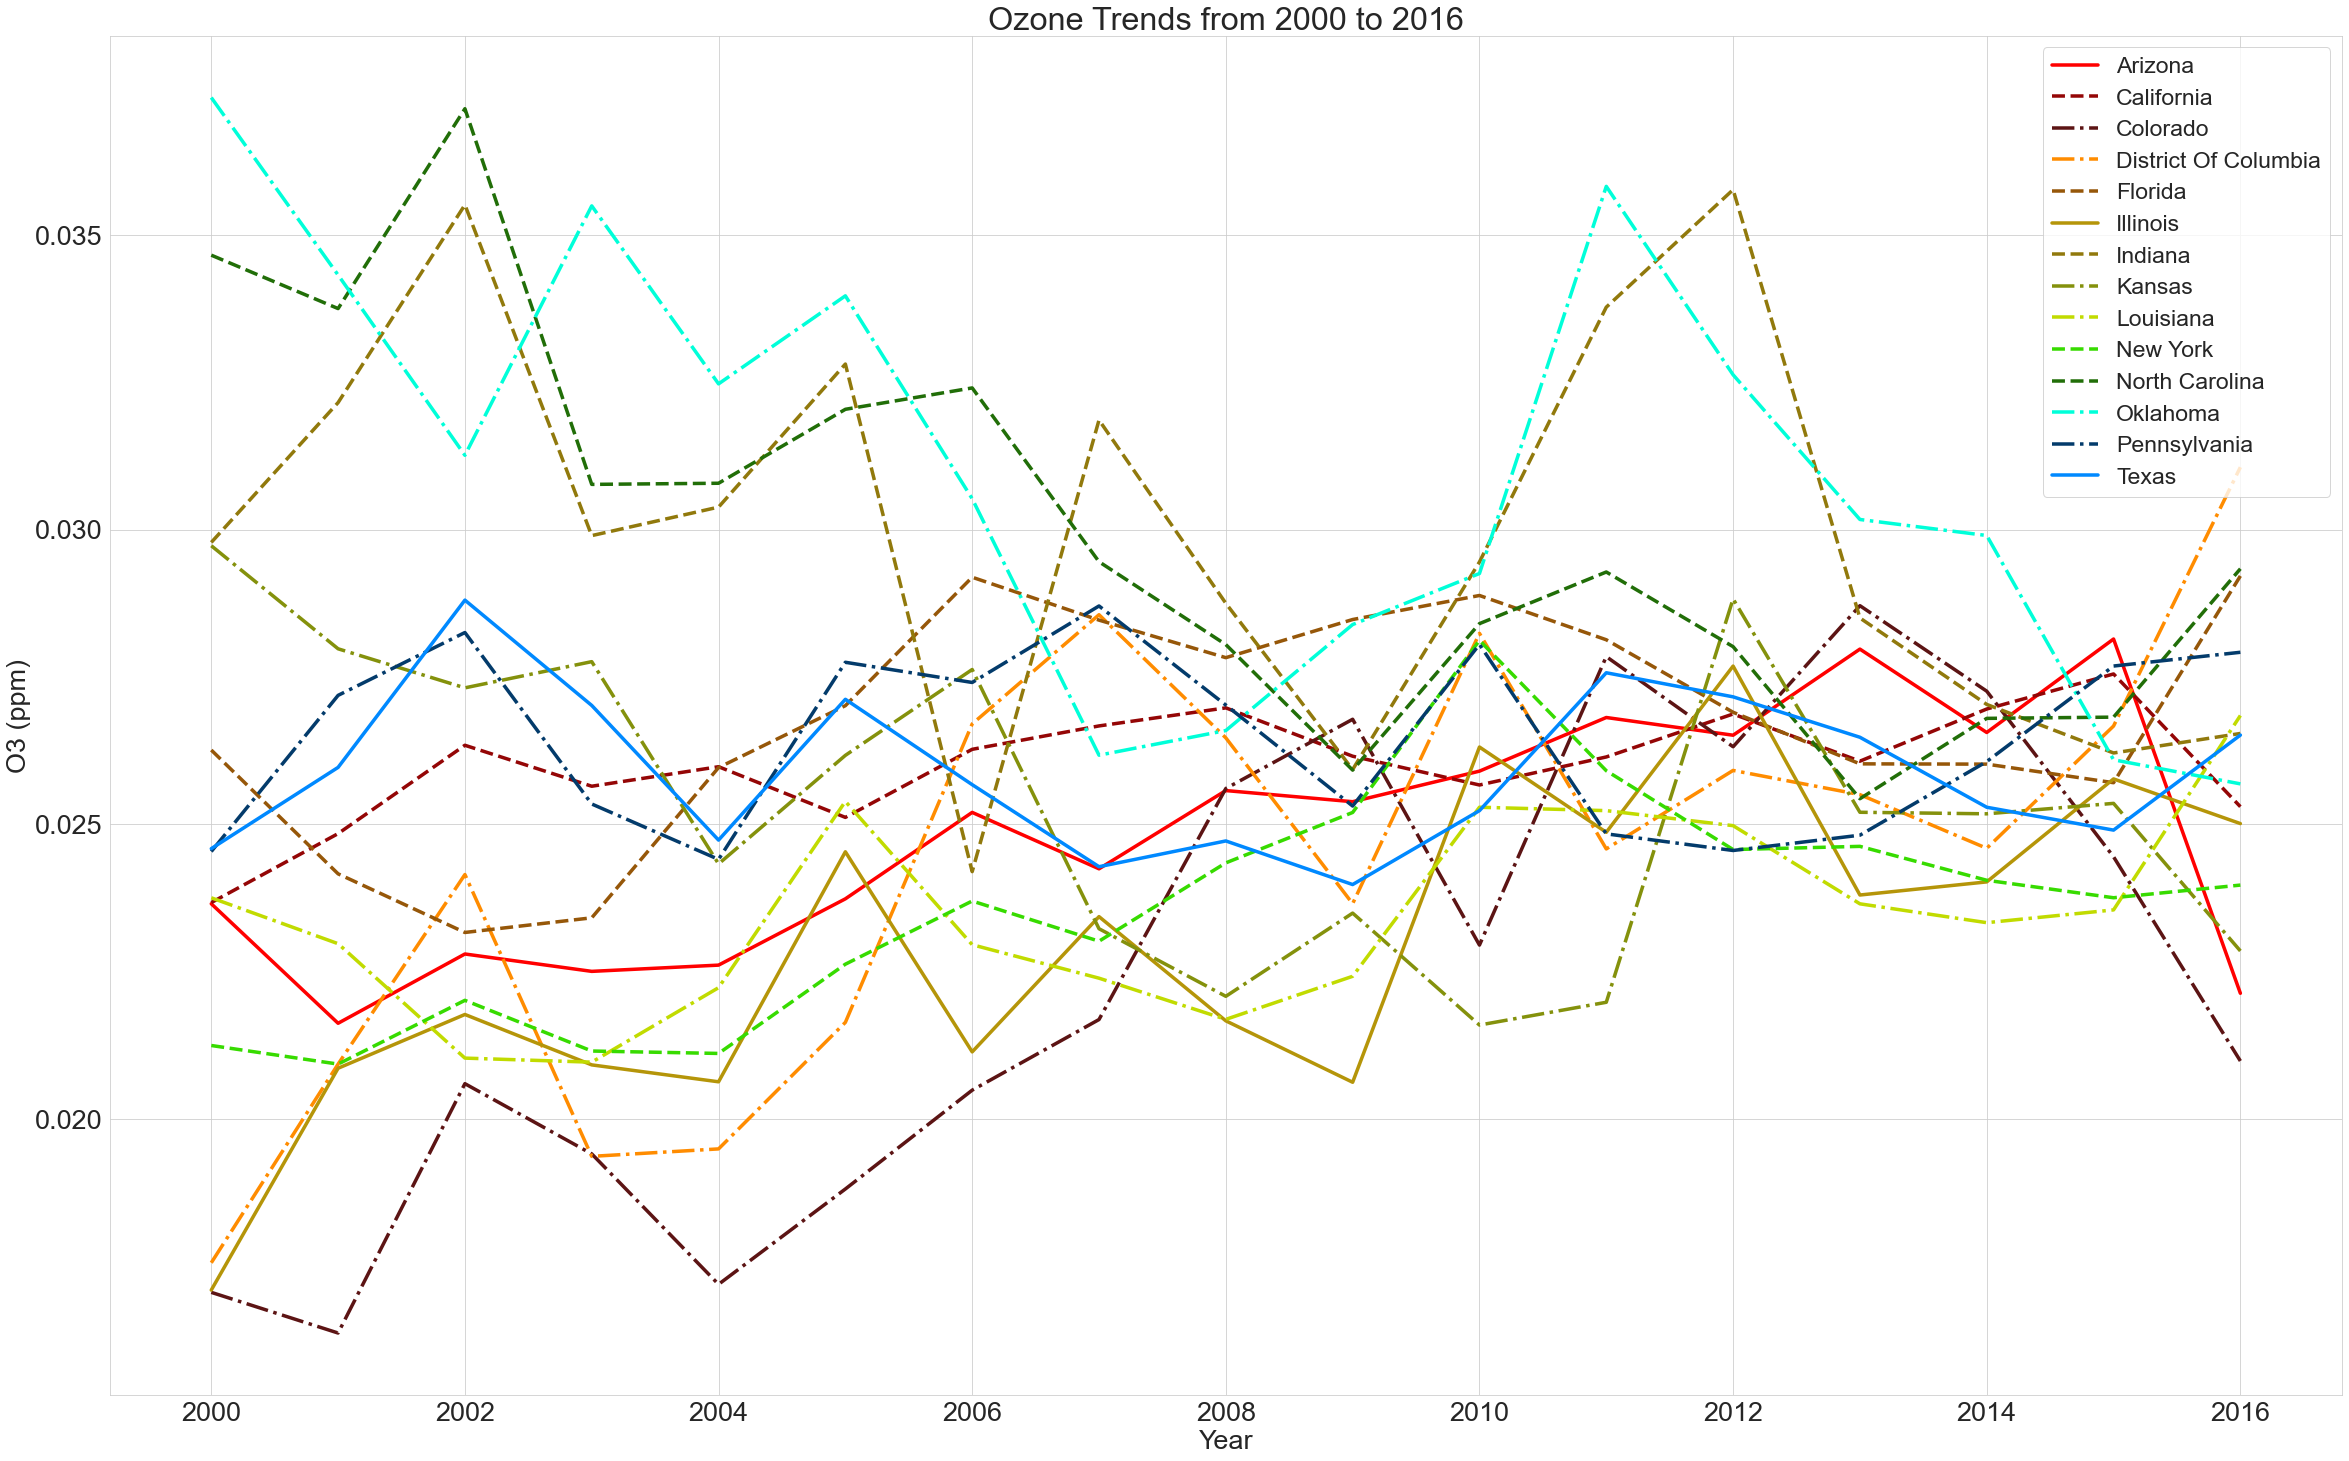

In [43]:
# O3
o3_df.plot(figsize=(40,25), color = plot_colors, linewidth=3.5, style = plot_line_styles)
plt.title("Ozone Trends from 2000 to 2016")
plt.xlabel("Year")
plt.ylabel("O3 (ppm)")

Text(0, 0.5, 'CO (ppm)')

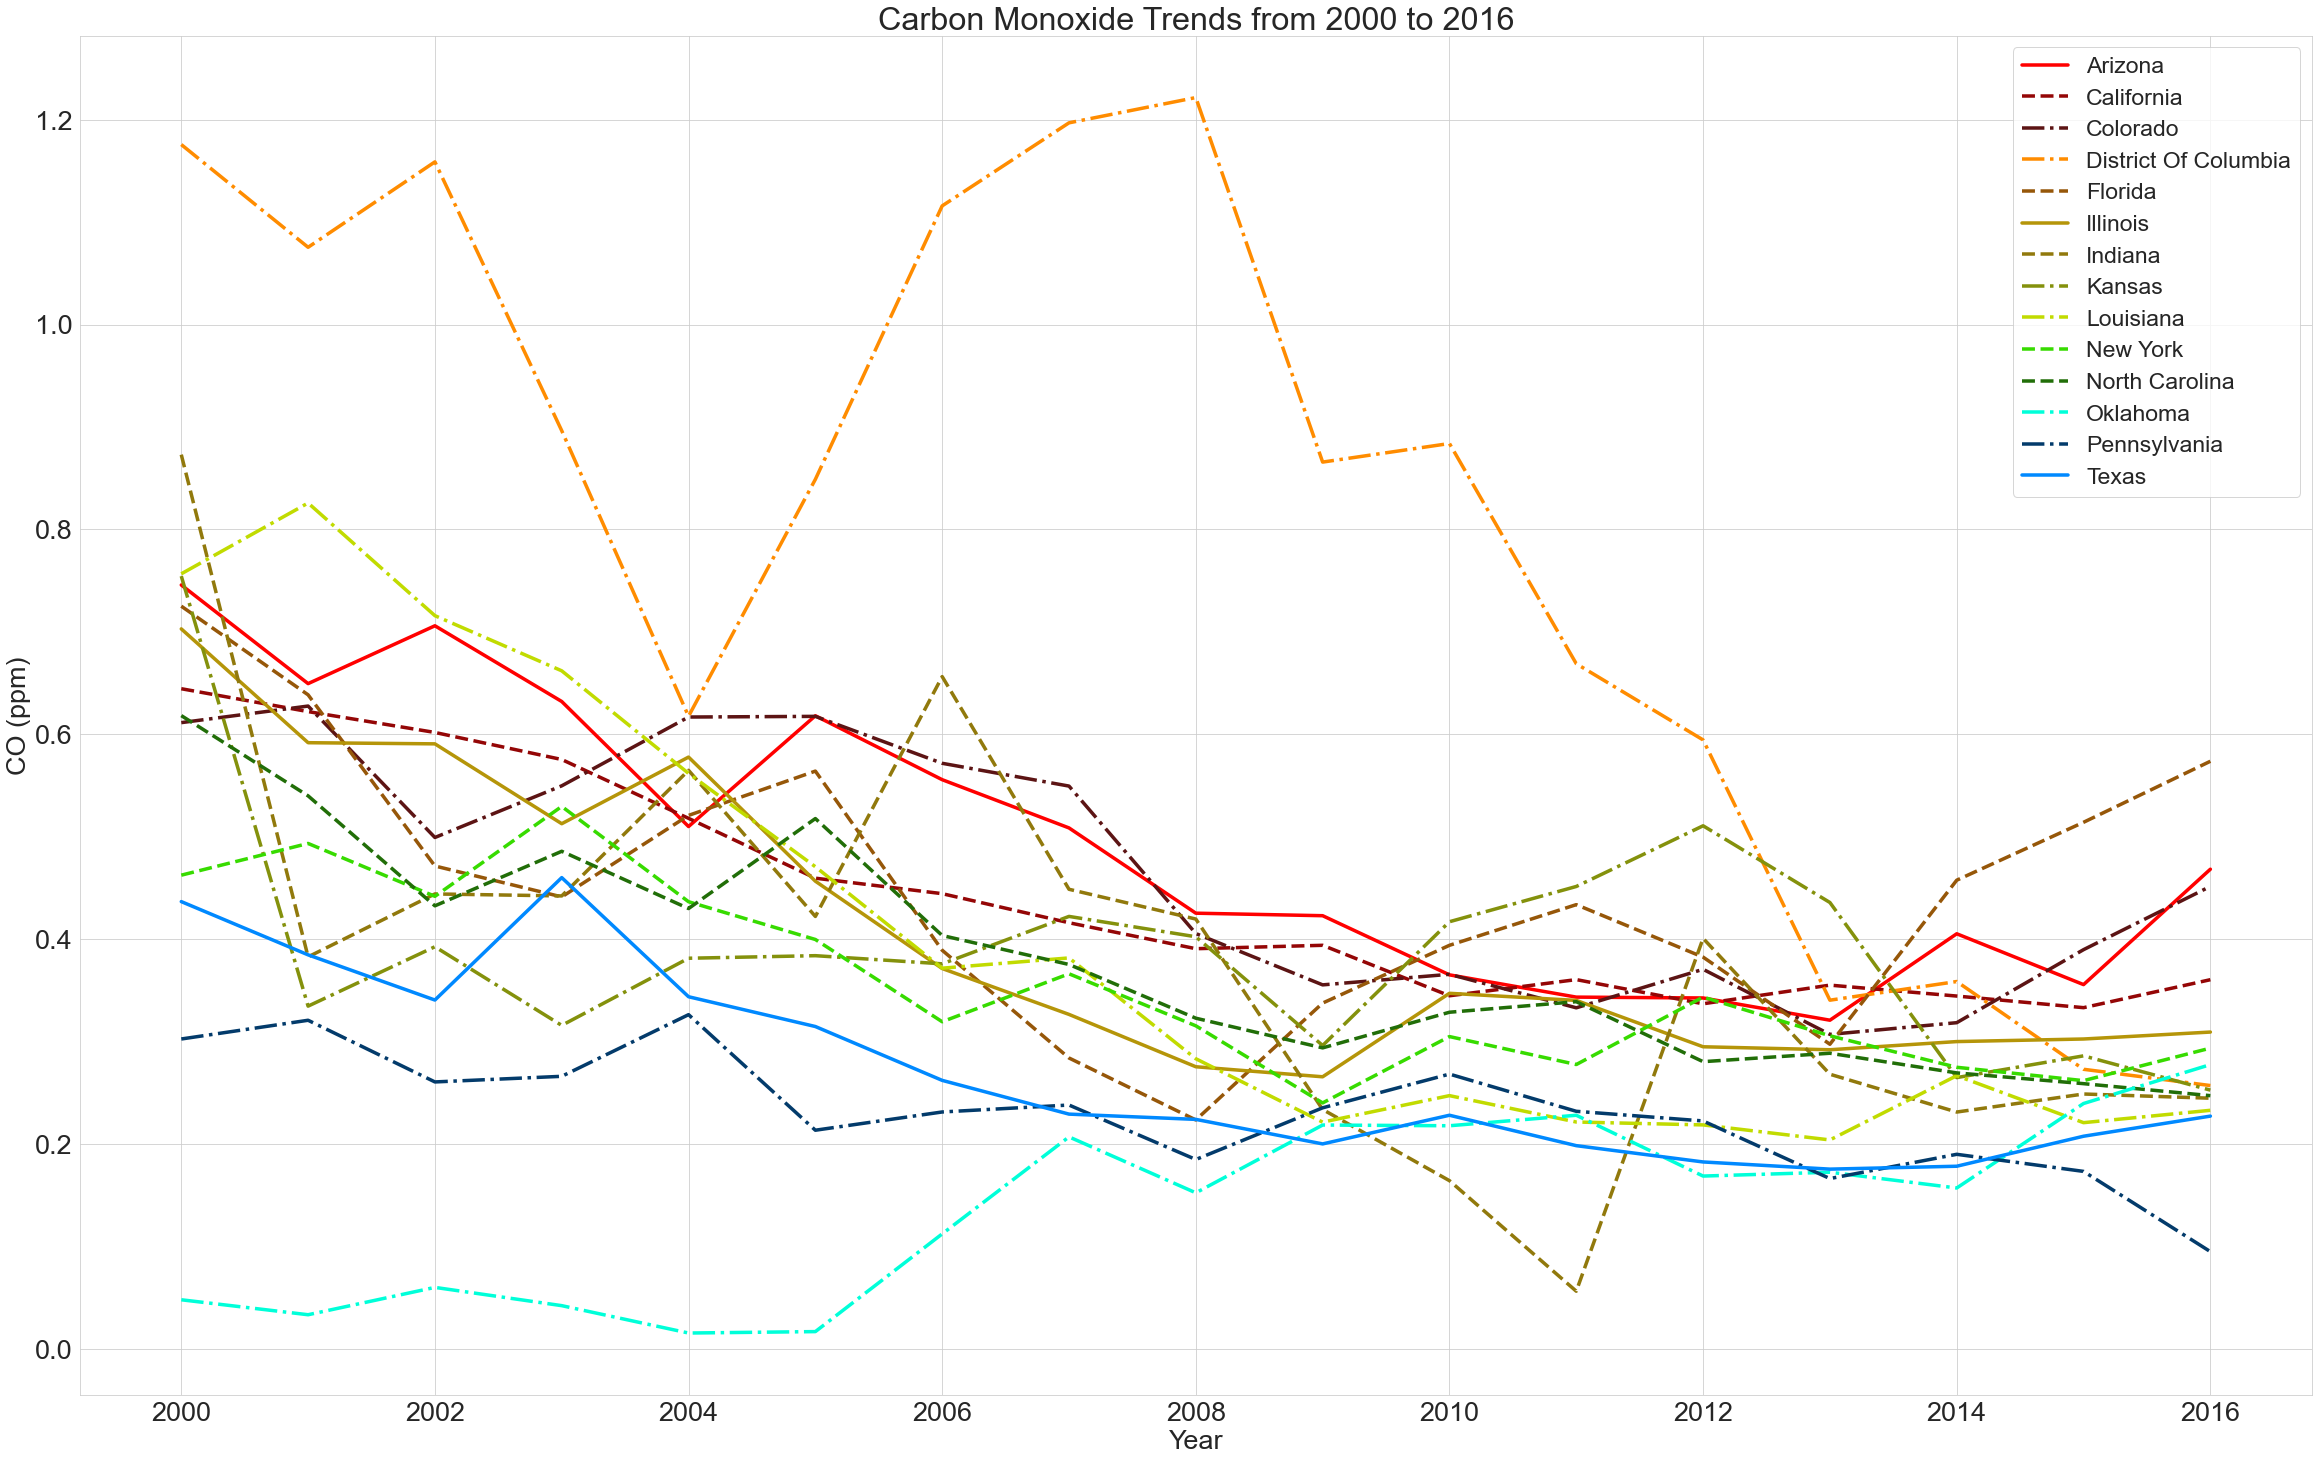

In [44]:
# CO
co_df.plot(figsize=(40,25), color = plot_colors, linewidth=3.5, style = plot_line_styles)
plt.title("Carbon Monoxide Trends from 2000 to 2016")
plt.xlabel("Year")
plt.ylabel("CO (ppm)")

Text(0, 0.5, 'Total Mean (ppm)')

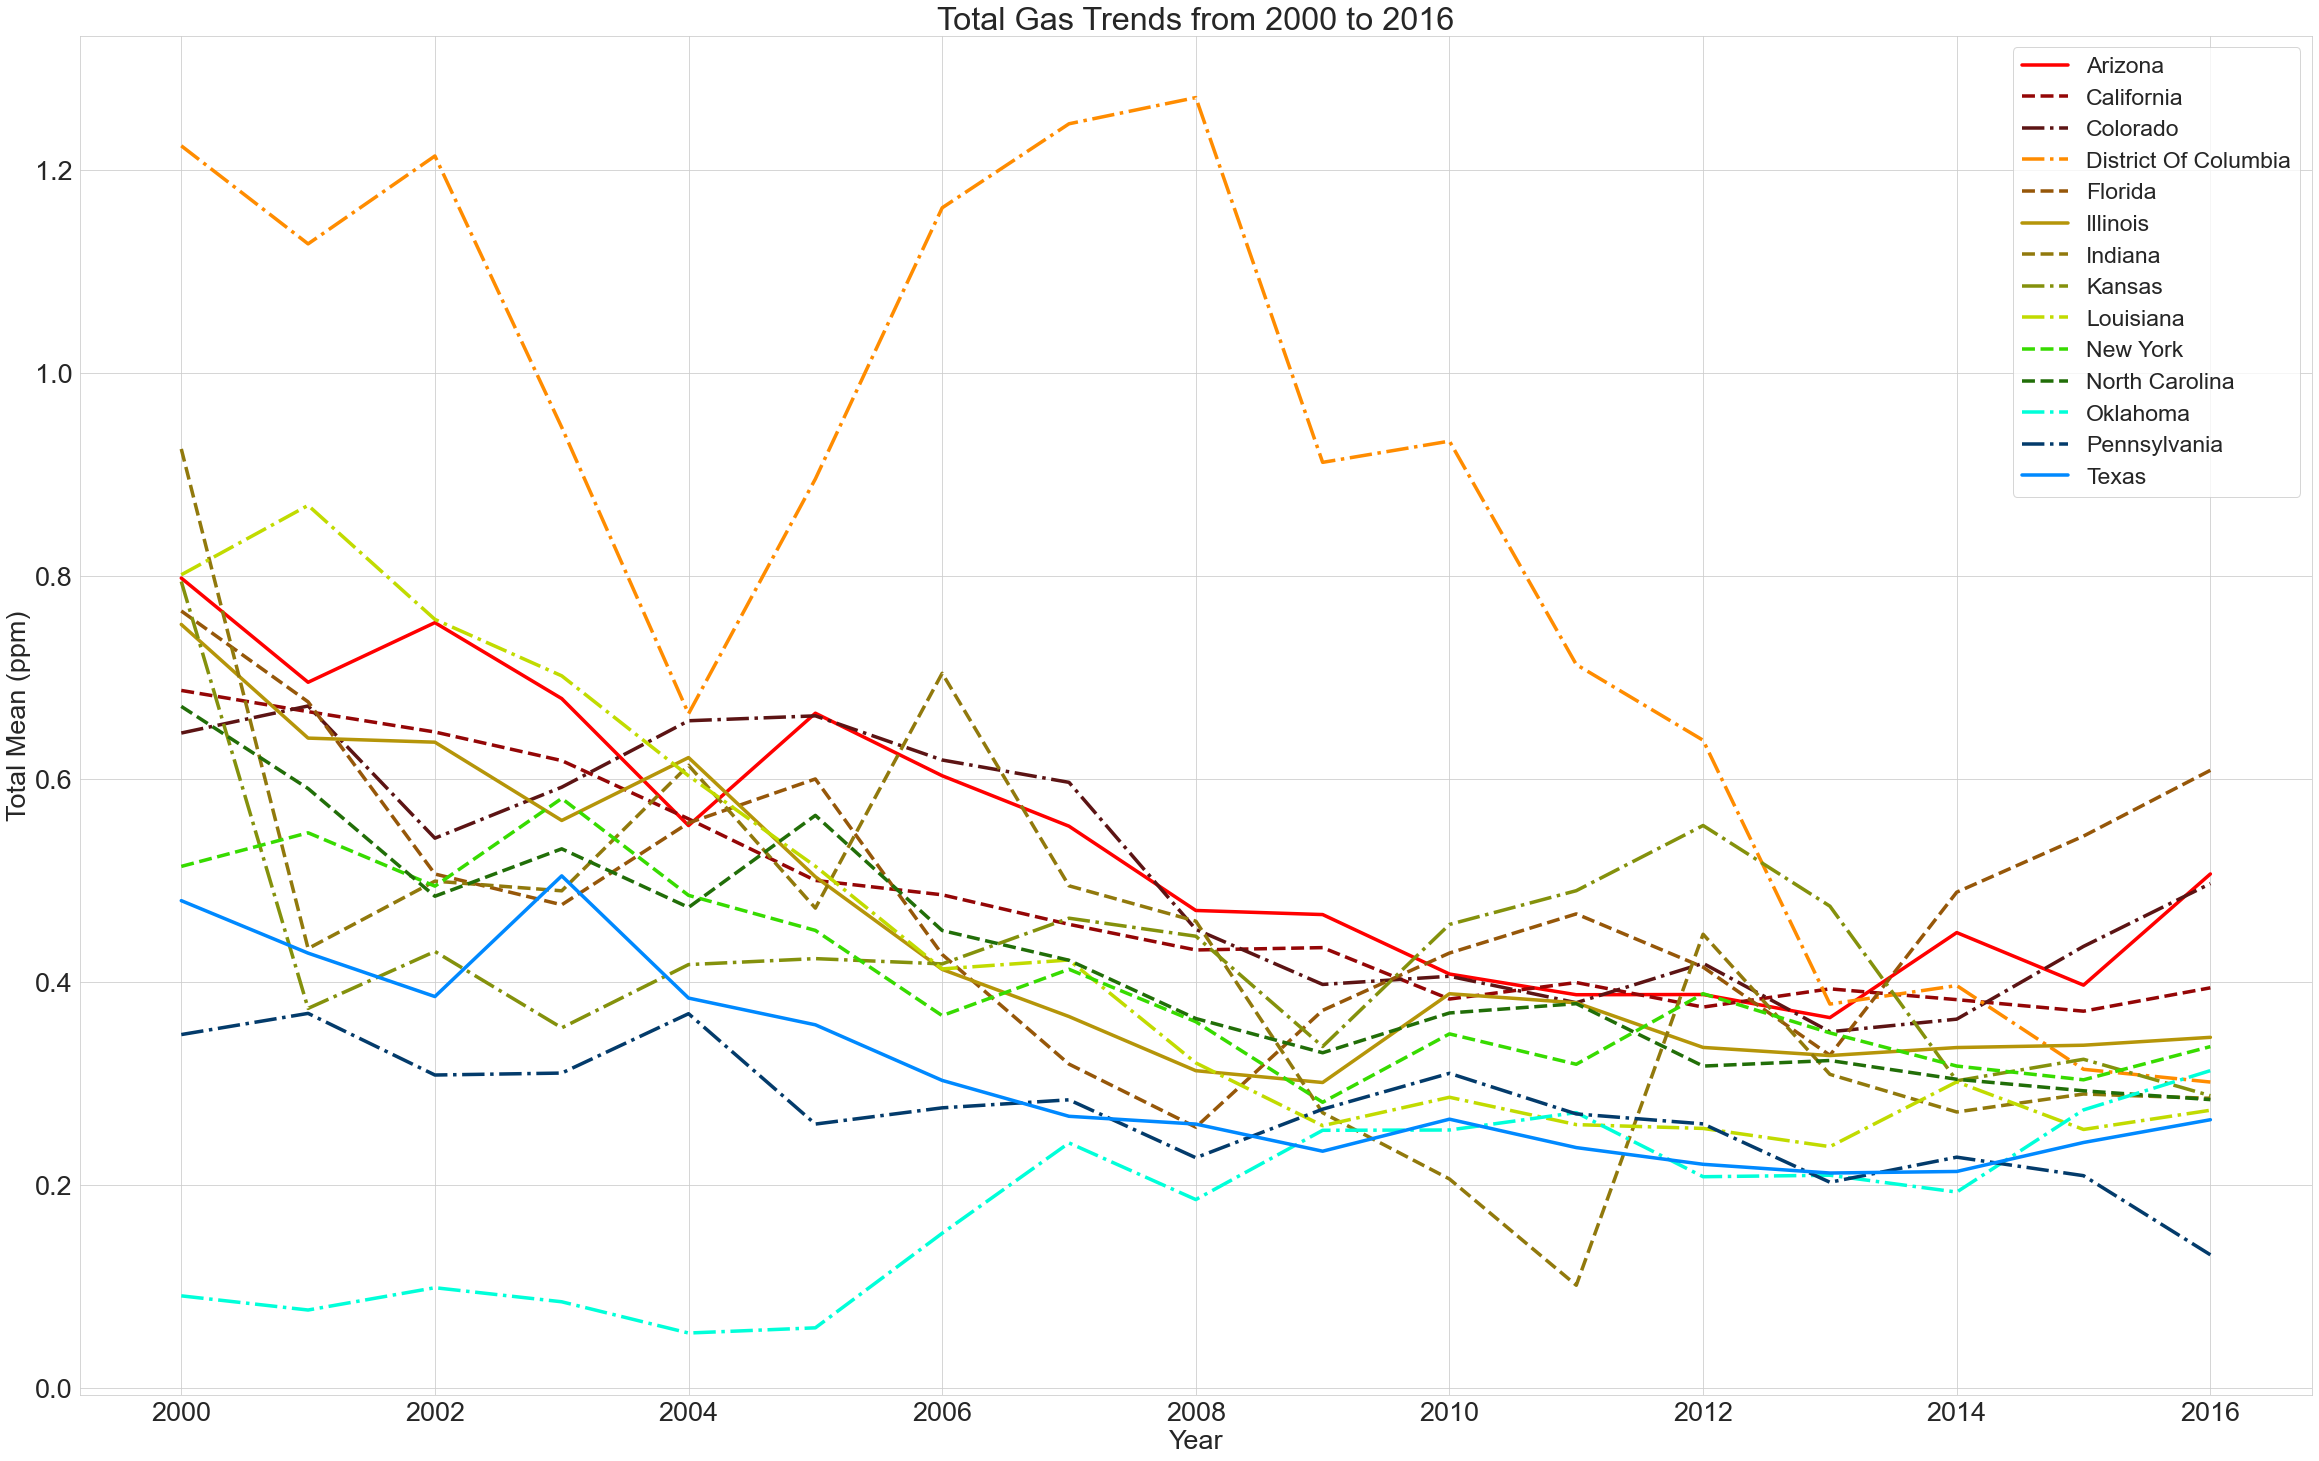

In [45]:
# Total Mean
total_df.plot(figsize=(40,25), color = plot_colors, linewidth=3.5, style = plot_line_styles)
plt.title("Total Gas Trends from 2000 to 2016")
plt.xlabel("Year")
plt.ylabel("Total Mean (ppm)")

### Spread of Data
One would now like to know which of the states have most variance (spread/standard deviation) in the values from 2000 to 2016. In order to accomplish this, an ordered dictionary has been created with keys as state names and corresponding values as the standard deviation of their values.

In [46]:
def get_std_dict(df):
    """
    Returns an ordered dictionary with keys as states and values as standard deviation of gas emissions from
    2000 to 2016.
    
    Args:
        df (dataframe): corresponds to one the gas dataframes computed using get_df(gas_name) function.
    
    Returns:
        sorted_dict (dict): dictionary with keys as states and values as standard devations of gas emissions.
                            It is sorted in ascending order of values.
    """
    std_dict = {col:df[col].std() for col in df.columns}
    sorted_dict = sorted(std_dict.items(), key=lambda kv: kv[1])
    return sorted_dict

In [47]:
get_std_dict(total_df)

[('Pennsylvania', 0.062188213519883906),
 ('Oklahoma', 0.08541836974412767),
 ('New York', 0.09177862518857477),
 ('Texas', 0.095434416761091),
 ('California', 0.1116326201193114),
 ('North Carolina', 0.11648243132316333),
 ('Colorado', 0.11762492000856321),
 ('Kansas', 0.11764702515294129),
 ('Florida', 0.13268996670718286),
 ('Arizona', 0.1393261490093493),
 ('Illinois', 0.1433897740712859),
 ('Indiana', 0.19897774233960153),
 ('Louisiana', 0.22033401784133239),
 ('District Of Columbia', 0.3461618455293802)]

From the above dictionary, one can infer that:
<ul>
    <li>District of Columbia had the most change in the total level of gases from 2000 to 2016.</li>
    <li>Pennsylvania had the least amount of change in total level of gases from 2000 to 2016.</li>
</ul>

In [48]:
get_std_dict(o3_df)

[('California', 0.0009342545540035828),
 ('Texas', 0.0013439454385264344),
 ('Pennsylvania', 0.0015284248986276595),
 ('Louisiana', 0.0016496511339722292),
 ('Florida', 0.0019248105437775867),
 ('New York', 0.0019328553506334006),
 ('Arizona', 0.002054771649908811),
 ('Kansas', 0.0025610626759470473),
 ('Illinois', 0.002668065517553538),
 ('North Carolina', 0.0032312118412388033),
 ('Indiana', 0.0033837543968197417),
 ('District Of Columbia', 0.003630220348056075),
 ('Oklahoma', 0.0036651319038233216),
 ('Colorado', 0.004070454737449666)]

From the above dictionary, one can infer that:
<ul>
    <li>Colorado had the most change in the ozone level from 2000 to 2016.</li>
    <li>California had the least amount of change in ozone level from 2000 to 2016.</li>
</ul>

In [49]:
get_std_dict(no2_df)

[('Oklahoma', 0.0010149772485136242),
 ('Kansas', 0.0018945764449411705),
 ('Indiana', 0.0023373584762668184),
 ('North Carolina', 0.002426110191731799),
 ('Pennsylvania', 0.0026502016323346573),
 ('California', 0.002653008513074053),
 ('Louisiana', 0.0026821220569744645),
 ('Texas', 0.0027157224473641785),
 ('Florida', 0.002885938542129752),
 ('Arizona', 0.0036230986553864373),
 ('New York', 0.0037536524446422285),
 ('Colorado', 0.0037631586719191878),
 ('District Of Columbia', 0.004260379636324139),
 ('Illinois', 0.0049505066271890025)]

From the above dictionary, one can infer that:
<ul>
    <li>Illinois had the most change in the nitrogen dioxide level from 2000 to 2016.</li>
    <li>California had the least amount of change in nitrogen dioxide level from 2000 to 2016.</li>
</ul>

In [50]:
get_std_dict(so2_df)

[('Oklahoma', 0.0004206889818880937),
 ('Florida', 0.0004986263626858052),
 ('Colorado', 0.0005010350724074311),
 ('California', 0.0005141062722387984),
 ('Arizona', 0.0005396644590045915),
 ('Texas', 0.0008112941665597334),
 ('Louisiana', 0.001145037699788849),
 ('North Carolina', 0.0012519021462269804),
 ('Kansas', 0.001346076509282474),
 ('Pennsylvania', 0.001547070139128196),
 ('Illinois', 0.001796609527276217),
 ('Indiana', 0.0024091520336838763),
 ('New York', 0.0024845104613958305),
 ('District Of Columbia', 0.002484886858459519)]

From the above dictionary, one can infer that:
<ul>
    <li>District of Columbia had the most change in the sulphur dioxide level from 2000 to 2016.</li>
    <li>Oklahoma had the least amount of change in sulphur dioxide level from 2000 to 2016.</li>
</ul>

In [51]:
get_std_dict(co_df)

[('Pennsylvania', 0.05918514260138151),
 ('Oklahoma', 0.08762056641508079),
 ('New York', 0.08781174724441328),
 ('Texas', 0.09212243690640896),
 ('California', 0.10930547522377637),
 ('North Carolina', 0.11069319805590828),
 ('Kansas', 0.11673180411004079),
 ('Colorado', 0.11857990575649495),
 ('Florida', 0.13125465161713679),
 ('Arizona', 0.13710261710542224),
 ('Illinois', 0.13890962872361434),
 ('Indiana', 0.19569920621351705),
 ('Louisiana', 0.21775865324319593),
 ('District Of Columbia', 0.3423079937384552)]

From the above dictionary, one can infer that:
<ul>
    <li>District of Columbia had the most change in the carbon monoxide level from 2000 to 2016.</li>
    <li>Pennsylvania had the least amount of change in carbon monoxide level from 2000 to 2016.</li>
</ul>

### Visualization of Spread
One of the main goals of this project/notebook is to able to visualize the data and make inferences from it. The above spreads (standard deviations) can be visualized using boxplots.

In [52]:
sns.set_theme(style="ticks")

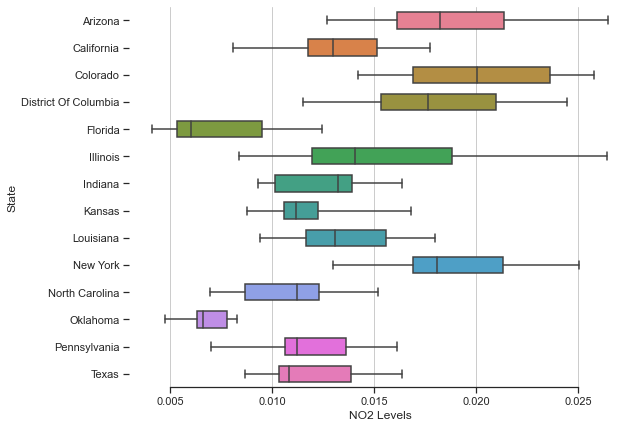

In [53]:
# NO2
# Initialize the figure
f, ax = plt.subplots(figsize=(9, 7))

# Plot the orbital period with horizontal boxes
sns.boxplot(x="value", y="variable", data=pd.melt(no2_df),
            whis=[0, 100], width=.6, palette="husl")

# Tweak the visual presentation
ax.xaxis.grid(True)
ax.set(ylabel="State", xlabel = "NO2 Levels")
sns.despine(trim=True, left=True)

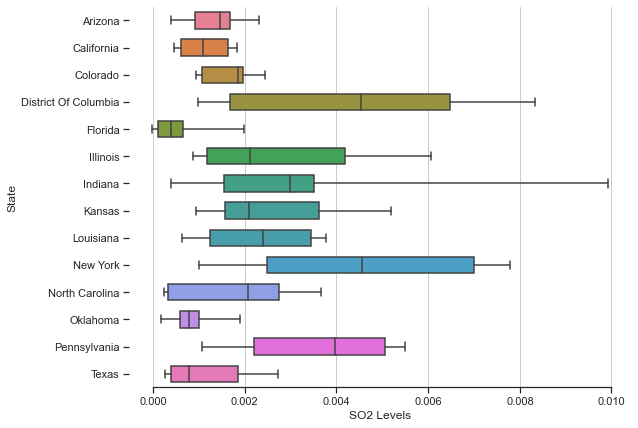

In [54]:
#SO2
# Initialize the figure
f, ax = plt.subplots(figsize=(9, 7))

# Plot the orbital period with horizontal boxes
sns.boxplot(x="value", y="variable", data=pd.melt(so2_df),
            whis=[0, 100], width=.6, palette="husl")

# Tweak the visual presentation
ax.xaxis.grid(True)
ax.set(ylabel="State", xlabel = "SO2 Levels")
sns.despine(trim=True, left=True)

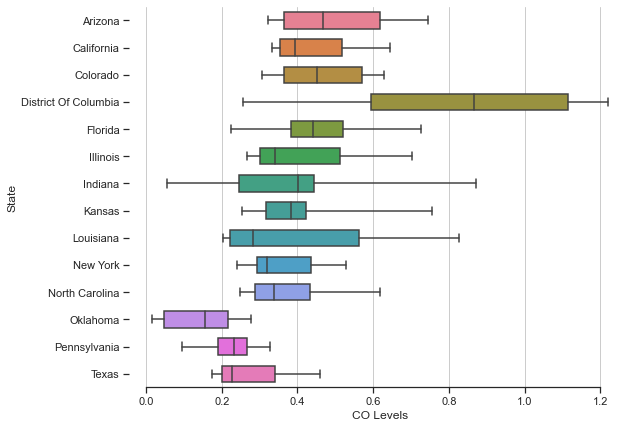

In [55]:
#CO
# Initialize the figure
f, ax = plt.subplots(figsize=(9, 7))

# Plot the orbital period with horizontal boxes
sns.boxplot(x="value", y="variable", data=pd.melt(co_df),
            whis=[0, 100], width=.6, palette="husl")

# Tweak the visual presentation
ax.xaxis.grid(True)
ax.set(ylabel="State", xlabel = "CO Levels")
sns.despine(trim=True, left=True)

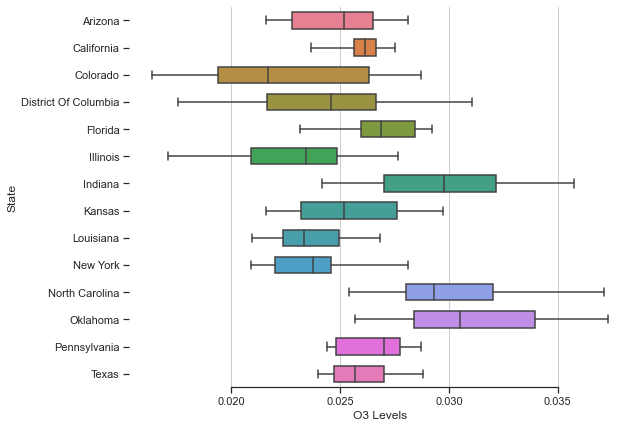

In [56]:
#O3
# Initialize the figure
f, ax = plt.subplots(figsize=(9, 7))

# Plot the orbital period with horizontal boxes
sns.boxplot(x="value", y="variable", data=pd.melt(o3_df),
            whis=[0, 100], width=.6, palette="husl")

# Tweak the visual presentation
ax.xaxis.grid(True)
ax.set(ylabel="State", xlabel = "O3 Levels")
sns.despine(trim=True, left=True)

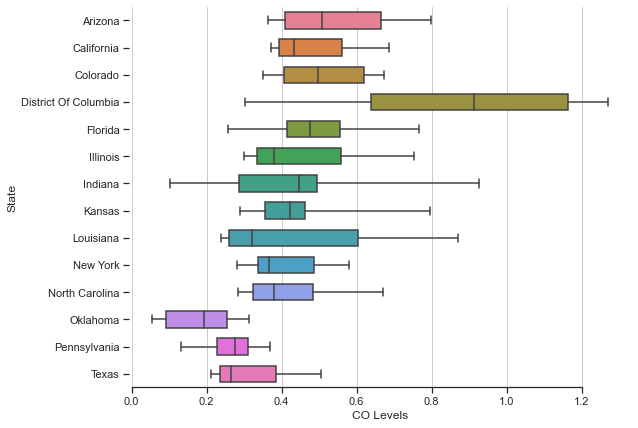

In [57]:
#Total
# Initialize the figure
f, ax = plt.subplots(figsize=(9, 7))

# Plot the orbital period with horizontal boxes
sns.boxplot(x="value", y="variable", data=pd.melt(total_df),
            whis=[0, 100], width=.6, palette="husl")

# Tweak the visual presentation
ax.xaxis.grid(True)
ax.set(ylabel="State", xlabel = "CO Levels")
sns.despine(trim=True, left=True)

## Visualization of Yearly Data
The goal of this section is to present a visualization of yearly emission of gases for each of the state. The visualizations presented in this section are more interactive than previous sessions as one can zoom in/out and pan the graphs. The graphs created in this section are geographic graphs where latitude and longitude coordinates have been taken into account. The graphs are also saved in a html format. This is because getting the latitutdes and longitudes is computationally super expensive. Hence, if one is just interested in the output or doesn't have necessary fast processors to run the code, the html files will be still accessible.

In [58]:
def get_city_df(state, df):
    """
    Produces a dataframe for a particular state. The entries for all the cities are averaged so as to have 
    one entry/measurement per city.
    
    Args:
        state (str): name of the state.
        df (dataframe): the dataframe from which entries for a particular state are extracted.
    
    Returns:
        sample_df (dataframe): extracted dataframe from df for a particular state.
    """
    cols = ['City', 'NO2 Mean', 'O3 Mean', 'SO2 Mean', 'CO Mean', 'Total Mean']
    sample_df = pd.DataFrame(columns = cols)
    cities = list(df['City'].unique())
    
    for city in cities:
        new_dict = {'State': state, 'City': city}
        city_df = df[df['City'] == city]
        no2_mean = city_df['NO2 Mean'].mean()
        new_dict['NO2 Mean'] = no2_mean
        o3_mean = city_df['O3 Mean'].mean()
        new_dict['O3 Mean'] = o3_mean
        so2_mean = city_df['SO2 Mean'].mean()
        new_dict['SO2 Mean'] = so2_mean
        co_mean = city_df['CO Mean'].mean()
        new_dict['CO Mean'] = co_mean
        total_mean = city_df['Total Mean'].mean()
        new_dict['Total Mean'] = total_mean
        sample_df = sample_df.append(new_dict, ignore_index=True)
    return sample_df

In [59]:
states = list(no2_df.columns)

In [60]:
def year_df(year):
    """
    Produces a dataframe for all the states and cities for a particular year. 
    The function calls get_city_df(state, df) to populate the final dataframe with every state and city.
    
    Args:
        year (str): any value from 2000 to 2016.
    
    Returns:
        final_df (dataframe): has all the gas emission values for all the states for a year.
    """
    df_list = []
    global df, states
    for state in states:
        state_df = df[df['State'] == state]
        state_df = state_df.loc[year]
        city_df = get_city_df(state, state_df)
        df_list.append(city_df)
    
    col_order = ['State', 'City', 'NO2 Mean', 'O3 Mean', 'SO2 Mean', 'CO Mean', 'Total Mean']
    final_df = pd.concat(df_list)
    final_df = final_df.reindex(columns=col_order)
    return final_df

In [61]:
city_pos = {}
def get_city_loc(loc_type, city):
    """ 
    Populates city_pos dictionary with latitudes and longitudes to make their computation more efficient 
    as one would then only compute them once for a particular location. Every time, that location is used, 
    city_pos dictionary is used. 
    """
    if(city in city_pos and loc_type in city_pos[city]):
        return city_pos[city][loc_type]
    else:
        if(city not in city_pos):
            city_pos[city] = {}
        if(loc_type == "lon"):
            val = geolocator.geocode(city)
            if(val):
                val = val.longitude
        else:
            val = geolocator.geocode(city)
            if(val):
                val = val.latitude
                
        val = val if val != None else 'NF'
        
        city_pos[city][loc_type] = val
        
        return val

In [62]:
def get_lat_long(df):
    """
    Adds latitudes and longitudes columns to the dataframe (df) based on the 'City' column.
    """
    df['Longitude'] = df['City'].apply(lambda x: get_city_loc('lon', x))
    df['Latitude'] = df['City'].apply(lambda x: get_city_loc('lat', x))
    return df

In [63]:
def show_data_year(gas_mean, year):
    """
    Produces a plot on the map with interactive features for a particular gas and particular year.
    The plot is saved as html file as well as shown in the Jupyter Notebook. 
    
    Args:
        gas_mean (str): any of the values from NO2 Mean, O3 Mean, SO2 Mean, CO Mean or Total Mean.
        year (str): any value from 2000 to 2016 inclusive.
    """
    state_city_df = year_df(year)
    state_city_df = get_lat_long(state_city_df)
    
    state_city_df['text'] = state_city_df['State'] + ' - ' + state_city_df['City']
    
    sizes = state_city_df[gas_mean] / sum(state_city_df[gas_mean]) * 800
    
    fig = go.Figure(data=go.Scattergeo(
            lon = state_city_df['Longitude'],
            lat = state_city_df['Latitude'],
            locationmode = 'USA-states',
            text = state_city_df['text'],
            mode = 'markers',
            marker = dict(
                size = sizes,
                opacity = 1,
                reversescale = True,
            autocolorscale = False,
                colorscale = 'Agsunset',
                cmin = 0,
                color = sizes,
                cmax = sizes.max(),
                colorbar_title=f"Gas Levels <br> (Scaled)"
            )
            ))
    
    fig.update_layout(
            title = f'{gas_mean[: gas_mean.find(" ")]} levels for {year}',
            geo_scope='usa',
        )
    
    plot_name = f'{gas_mean[:gas_mean.find(" ")]}_{year}.html'
    fig.write_html(plot_name, default_width="60%")
    fig.show()

In [64]:
show_data_year("Total Mean", "2016")

Seems like Pheonix, Arizona has maximum total gas emissions in 2016, followed by Winter Park, Florida. 

In [65]:
show_data_year("Total Mean", "2000")

Interestingly, from previous two graphs, one sees that Pheonix, Arizona was not leading in maximum gas emissions in 2000 and same goes with Winter Park, Florida. But over the course of 17 years, these two cities have rised up to the top.

In [66]:
show_data_year("NO2 Mean", "2016")

In year 2016, Denver, Colorado is leading with maximum nitrogen dioxide emissions, followed by Pheonix, Arizona.

In [67]:
show_data_year("NO2 Mean", "2000")

Again, it is quite astonishing to see that Denver, Colorado had one of the least nitrogen dioxide emissions in 2000, but rose to the top in the span of 17 years. Pheonix, Arizona, on the other hand, was among the top in 2000 (with Los Angles, California and Burbank, California) and is still among the top in 2016.

## Final Thoughts

One can run the above function to produce visualizations for each year. The visualizations are quite fun to play with and can help draw easy inferences. We have presented a couple of inferences in this notebook by just comparing the values in 2000 and 2016 for total gas emission levels and nitrogen dioxide emission levels. We encourage more inferences to be made by the user for for the remaining gases as well as for other years. 